In [1]:
## Lesson 2

# Numpy will be used to help generate the sample data set.
# Importing libraries is the first step we will take.

import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import sys

# Enable inline plotting
%matplotlib inline

In [2]:
print 'Python version ' + sys.version
print 'Pandas version ' + pd.__version__

Python version 2.7.10 (default, Jul 14 2015, 19:46:27) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.39)]
Pandas version 0.16.2


In [3]:
# Create Data

# The data set will consist of 1000 baby names and the number
# of births recorded for that year (1880). We will add plenty of
# duplicates.

# The initial set of baby names
names = ['Bob', 'Jessica', 'Mary', 'John', 'Mel']


In [4]:
# To make a random list of 1,000 baby names using the five above,
# we will do the following:
# Generate a number between 0 and 4
# To do this we will be using the functions seed, randint, len, range, and zip

# This will ensure the random samples below can be reproduced
random.seed(500)
random_names = [names[random.randint(low=0,high=len(names))] for i in range(1000)]

# Print the first 10 names
random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

In [5]:
# Generate random numbers between 0 and 1000
# The number of births per name for the year 1880

births = [random.randint(low=0, high=1000) for i in range(1000)]
births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

In [6]:
# Merge the names and births with the zip function
BabyDataSet = zip(random_names, births)
BabyDataSet[:10]

[('Mary', 968),
 ('Jessica', 155),
 ('Jessica', 77),
 ('Bob', 578),
 ('Jessica', 973),
 ('Jessica', 124),
 ('Jessica', 155),
 ('Mary', 403),
 ('Mary', 199),
 ('Mary', 191)]

In [7]:
# Put it in a DataFrame object
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df[:10]

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973
5,Jessica,124
6,Jessica,155
7,Mary,403
8,Mary,199
9,Mary,191


In [8]:
# Save to txt file
df.to_csv('births1880.txt', index=False, header=False)

In [13]:
# Now bring the data back!

df = pd.read_csv('births1880.txt')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 2 columns):
Mary    999 non-null object
968     999 non-null int64
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


In [16]:
df = pd.read_csv('births1880.txt', names=['Names','Births'])
df.head(5)

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973


In [17]:
# Now delete the txt file!
import os
os.remove('births1880.txt')

In [19]:
# Use unique property of the dataframe to find all the unique
# records of the 'Names' column

# Method 1
df['Names'].unique()

array(['Mary', 'Jessica', 'Bob', 'John', 'Mel'], dtype=object)

In [25]:
# Method 2 if you actually want to print the names out
for x in df['Names'].unique():
    print x

Mary
Jessica
Bob
John
Mel


In [27]:
# Method 3
print df['Names'].describe()

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object


In [29]:
# To aggregate the 1000 rows to the unique 5, use Groupby function
name = df.groupby('Names')

# Apply the sum function to the groupby object
df = name.sum()
df

,Births
Names,
Bob,106817
Jessica,97826
John,90705
Mary,99438
Mel,102319


In [31]:
# Analyze the Data

# To find most populat baby name there are two methods

# Method 1 - Sort and select top row
Sorted = df.sort(['Births'], ascending=False)
Sorted.head(1)

,Births
Names,
Bob,106817


In [32]:
# Method 2 - Use the max function
df['Births'].max()

106817

The most popular name


,Births
Names,
Bob,106817
Mel,102319
Mary,99438
Jessica,97826
John,90705


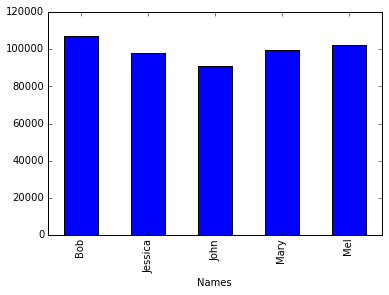

In [34]:
# Present the data

# Plot births column and show user the highest point
# Create graph
df['Births'].plot(kind='bar')

print"The most popular name"
df.sort(columns='Births', ascending=False)
